In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df2 = pd.read_json("./dataset/train.json")

In [3]:
df2['_id'] = df2.index
df2.set_index('_id')
df2.sort_index()
df2.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,_id
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,4
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low,6


# 1) Histogram of "price"

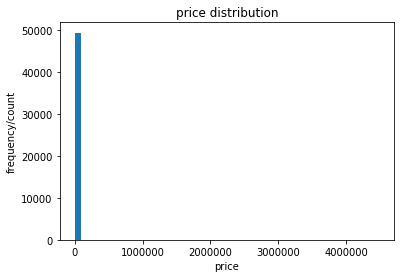

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

In [4]:
bins = np.linspace(df2['price'].min(), df2['price'].max(), 50)
plt.hist(df2['price'], bins )
plt.xlabel('price')
plt.ylabel('frequency/count')
plt.title("price distribution")
plt.show()
df2['price'].describe()

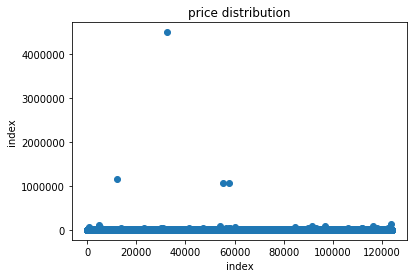

In [5]:
plt.scatter(df2['_id'], df2['price'])
plt.xlabel('index')
plt.ylabel('index')
plt.title('price distribution')
plt.show()

because of ourliers, the historgram is extremely skewed towards those outliers

## 1.1) Histogram of prices within 75% 

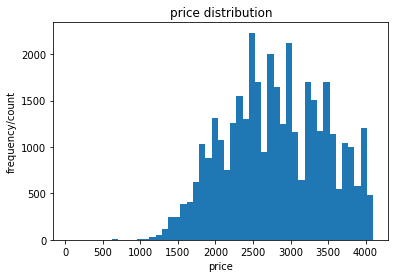

count    37097.000000
mean      2808.845891
std        664.375558
min         43.000000
25%       2300.000000
50%       2800.000000
75%       3325.000000
max       4100.000000
Name: price, dtype: float64

In [6]:
newdf = df2[df2.price <= df2['price'].quantile(0.75)]
bins = np.linspace(newdf['price'].min(), newdf['price'].max(), 50)
plt.hist(newdf['price'], bins )
plt.xlabel('price')
plt.ylabel('frequency/count')
plt.title("price distribution")
plt.show()
newdf['price'].describe()

When outliers are removed, we can see the distributions of values more clearly

# 2) Histogram of "longitude"

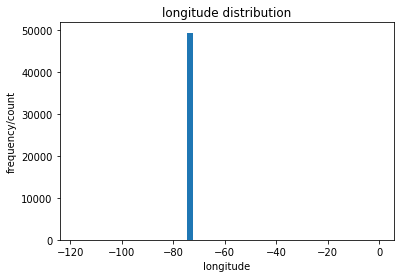

count    49352.000000
mean       -73.955716
std          1.177912
min       -118.271000
25%        -73.991700
50%        -73.977900
75%        -73.954800
max          0.000000
Name: longitude, dtype: float64

In [7]:
bins = np.linspace(df2['longitude'].min(), df2['longitude'].max(), 50)
plt.hist(df2['longitude'], bins )
plt.xlabel('longitude')
plt.ylabel('frequency/count')
plt.title("longitude distribution")
plt.show()
df2['longitude'].describe()

Similarly, there seems to be outliers that make the graph skewed.

## 2.1) Histogram of longitude within 75% 

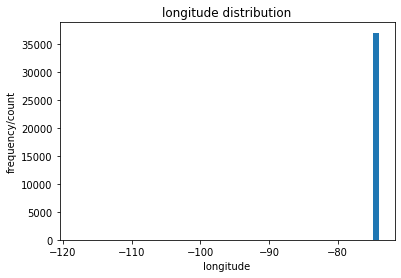

count    37046.000000
mean       -73.987467
std          0.269446
min       -118.271000
25%        -73.996300
50%        -73.984200
75%        -73.973900
max        -73.954800
Name: longitude, dtype: float64

In [8]:
newdf = df2[df2.longitude <= df2['longitude'].quantile(0.75)]
bins = np.linspace(newdf['longitude'].min(), newdf['longitude'].max(), 50)
plt.hist(newdf['longitude'], bins )
plt.xlabel('longitude')
plt.ylabel('frequency/count')
plt.title("longitude distribution")
plt.show()
newdf['longitude'].describe()

## 2.2) Histogram of longitude within 50% 

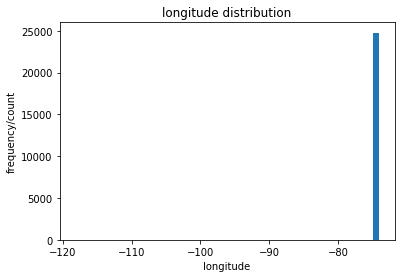

count    24777.000000
mean       -73.997672
std          0.328958
min       -118.271000
25%        -74.002200
50%        -73.991700
75%        -73.984000
max        -73.977900
Name: longitude, dtype: float64

In [9]:
newdf = df2[df2.longitude <= df2['longitude'].quantile(0.50)]
bins = np.linspace(newdf['longitude'].min(), newdf['longitude'].max(), 50)
plt.hist(newdf['longitude'], bins )
plt.xlabel('longitude')
plt.ylabel('frequency/count')
plt.title("longitude distribution")
plt.show()
newdf['longitude'].describe()

As you can see, there are large datapoints that have relatively close values. The y-axis shows the count of datapoints that have a specific degree of longitude, x, on x-axis. With this in mind, we assume that a significant number of datapoints are neary -73.984200. The graph below demonstrates our educated guess!

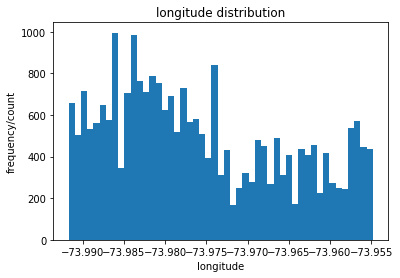

count    24756.000000
mean       -73.975782
std          0.010537
min        -73.991700
25%        -73.984300
50%        -73.977900
75%        -73.967375
max        -73.954800
Name: longitude, dtype: float64

In [10]:
newdf = df2[ (df2.longitude <= df2['longitude'].quantile(0.75)) & (df2.longitude >= df2['longitude'].quantile(0.25))]
bins = np.linspace(newdf['longitude'].min(), newdf['longitude'].max(), 50)
plt.hist(newdf['longitude'], bins )
plt.xlabel('longitude')
plt.ylabel('frequency/count')
plt.title("longitude distribution")
plt.show()
newdf['longitude'].describe()

# 3) Histogram of "latitude"

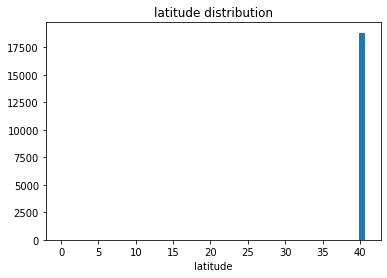

count    49352.000000
mean        40.741545
std          0.638535
min          0.000000
25%         40.728300
50%         40.751800
75%         40.774300
max         44.883500
Name: latitude, dtype: float64

In [11]:
bins = np.linspace(0, df2.loc[:,"latitude"].mean(), 50)
plt.hist(df2['latitude'], bins)
plt.xlabel('latitude')
plt.title("latitude distribution")
plt.show()
df2['latitude'].describe()

By looking at the table of value, it shows the similar result as "longitude", where a significant number of values are within a specific range. In this case, they are near 40.7.

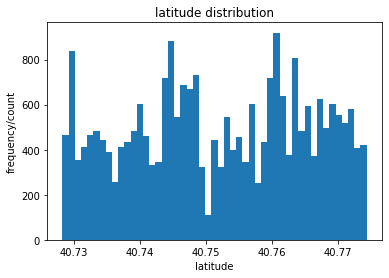

count    24749.000000
mean        40.751827
std          0.013233
min         40.728300
25%         40.741100
50%         40.751800
75%         40.763300
max         40.774300
Name: latitude, dtype: float64

In [12]:
newdf = df2[ (df2.latitude <= df2['latitude'].quantile(0.75)) & (df2.latitude >= df2['latitude'].quantile(0.25))]
bins = np.linspace(newdf['latitude'].min(), newdf['latitude'].max(), 50)
plt.hist(newdf['latitude'], bins )
plt.xlabel('latitude')
plt.ylabel('frequency/count')
plt.title("latitude distribution")
plt.show()
newdf['latitude'].describe()